<a href="https://colab.research.google.com/github/hongwon2/BigQuery-Practice/blob/main/%EB%B9%85%EC%BF%BC%EB%A6%AC_colab_%EC%97%B0%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'liquid-terra-362502' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=liquid-terra-362502:US:bquxjob_1cc51a97_183fddbbefc)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_1cc51a97_183fddbbefc') # Job ID inserted based on the query results selected to explore
print(job.query)

select *
from market.sample_data


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_1cc51a97_183fddbbefc') # Job ID inserted based on the query results selected to explore
sales_data = job.to_dataframe()
sales_data

,Date,Order_ID,Customer_ID,Product_ID,Sale
0,2018-06-29,CA-2018-147039,AA-10315,OFF-AP-10000576,363
1,2018-06-29,CA-2018-147039,AA-10315,OFF-BI-10004654,12
2,2016-10-04,CA-2016-121391,AA-10315,OFF-ST-10001590,27
3,2015-03-31,CA-2015-128055,AA-10315,OFF-BI-10004390,674
4,2015-03-31,CA-2015-128055,AA-10315,OFF-AP-10002765,53
...,...,...,...,...,...
9718,2017-07-08,CA-2017-152471,ZD-21925,TEC-PH-10002824,824
9719,2017-07-08,CA-2017-152471,ZD-21925,OFF-PA-10004965,16
9720,2017-04-03,CA-2017-167682,ZD-21925,FUR-FU-10003799,71
9721,2017-04-03,CA-2017-167682,ZD-21925,TEC-PH-10000673,260


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
sales_data.describe()

,Sale
count,9723.000000
mean,231.836162
std,628.833061
min,0.000000
25%,17.000000
50%,55.000000
75%,211.000000
max,22638.000000


#analysis

In [ ]:
import pandas as pd

In [ ]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
sales_data.head()

,Date,Order_ID,Customer_ID,Product_ID,Sale,s_mth
0,2018-06-29,CA-2018-147039,AA-10315,OFF-AP-10000576,363,2018-06
1,2018-06-29,CA-2018-147039,AA-10315,OFF-BI-10004654,12,2018-06
2,2016-10-04,CA-2016-121391,AA-10315,OFF-ST-10001590,27,2016-10
3,2015-03-31,CA-2015-128055,AA-10315,OFF-BI-10004390,674,2015-03
4,2015-03-31,CA-2015-128055,AA-10315,OFF-AP-10002765,53,2015-03


In [ ]:
sales_data.shape

(9723, 6)

In [ ]:
sales_data.dtypes

Date           datetime64[ns]
Order_ID               object
Customer_ID            object
Product_ID             object
Sale                    int64
s_mth                  object
dtype: object

In [ ]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [ ]:
sales_data['Date'].head()

0   2018-06-29
1   2018-06-29
2   2016-10-04
3   2015-03-31
4   2015-03-31
Name: Date, dtype: datetime64[ns]

In [ ]:
sales_data['s_mth']=sales_data['Date'].dt.strftime('%Y-%m')

In [ ]:
sales_data['s_mth'].head()

0    2018-06
1    2018-06
2    2016-10
3    2015-03
4    2015-03
Name: s_mth, dtype: object

In [ ]:
Ym_sales_cnt = sales_data.groupby('s_mth')[['Order_ID']].count()

In [ ]:
Ym_sales_cnt

s_mth
2015-01     77
2015-02     46
2015-03    151
2015-04    130
2015-05    119
2015-06    131
2015-07    142
2015-08    144
2015-09    267
2015-10    156
2015-11    304
2015-12    273
2016-01     56
2016-02     64
2016-03    125
2016-04    159
2016-05    143
2016-06    126
2016-07    136
2016-08    158
2016-09    285
2016-10    159
2016-11    316
2016-12    309
2017-01     89
2017-02     82
2017-03    159
2017-04    164
2017-05    219
2017-06    189
2017-07    196
2017-08    175
2017-09    349
2017-10    192
2017-11    360
2017-12    337
2018-01    142
2018-02    104
2018-03    233
2018-04    198
2018-05    238
2018-06    233
2018-07    223
2018-08    214
2018-09    449
2018-10    294
2018-11    453
2018-12    455
Name: Order_ID, dtype: int64

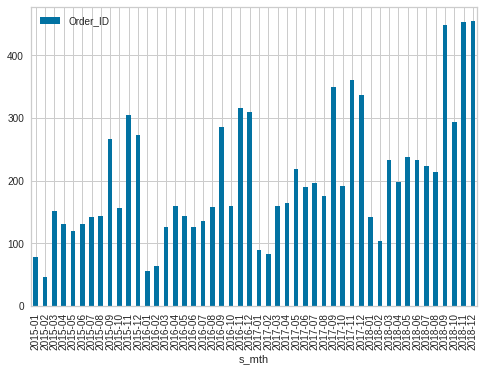

In [ ]:
Ym_sales_cnt.plot(kind = 'bar')